# The Geography of Pacific Beach Business

This brief analysis examines the location of businesses in Pacific Beach, a residential neighborhood in San Diego with a very popular entertainment district. 

The City of San Diego has over 50,000 businesses registered to pay the San Diego City business tax. It is difficult to imagine that the city has such a large number of businesses; even a city as diverse as San Diego can't have that many restaurants, nail salons and tatoo parlors. With a little analysis, it quickly becomes apparent that most of these businesses are nearly invisble. They don't have storefronts, and they are located in out-of-the-way places: the geography of business in San Diego has many surprises. In this analysis, we will look specifically at the beach neighbohood of San Diego. 

The data for this analysis comes from several sources. The City of San Diego's [Master Business Listing](https://www.sandiego.gov/treasurer/taxesfees/btax/nblactive) provides the names, address and NAICS codes for all of the businesses. These businesses are then geocoded with Pelias and linked to clusters of [Points of Interest derived from Open Street Map](https://wiki.openstreetmap.org/wiki/Points_of_interest) and Census block groups. These dataset are combined and published in a [datapackage](https://data.sandiegodata.org/dataset/sandiegodata-org-business-clusters/) at the San Diego Regional Data Library. 


In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

import contextily as cx

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()

pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

# San Diego Business Clusters
`sandiegodata.org-business_clusters-1.3.3` Last Update: 2021-03-26T16:31:14

_Business in San Diego linked to entertainment clusters and population density._


This dataset processes the City of San Diego Master Business file to add
geocoded addresses and links to business clusters. San Diego publishes two
lists of businesses, which are based on payment of the San Diego City business
tax: the Master Business File, and a [SANGIS file that includes geographic
information.
](https://data.sandiegodata.org/dataset/sangis-org-business-sites/) Unfortunatel
y, these files are quite different and cannot be linked. The SANGIS file is
oriented toward the tax assessors parcel that the business occupies, and the
Master Business List has account numbers and addresses, but there is no common
key between the files.

The files in this package add address geocodes to the Master Business List, and
links the businesses to clusters of businesses. The Clusters are created by
collecting nearby businesses from Open Street Map data. The cluster types are:

* NA: No cluster, 31787 businesses
* shop: OSM tags 'shop', 'clothes', 'supermarket', 'bank', 'laundry', 'parking',  14615 businesses
* ent: Entertainment, OSM tags 'cafe', 'restaurant', 'bar', 14320 businesses
* casual: Fast food and convenience stores, OSM tags  'fast_food', 'convenience', 10991 businesses

The ``sd_business_clusters`` file has the clusters and their WKT geographies.
The ``sd_custered_businesses`` links San Diego businesses to clusters, and a
single business may be in more than one cluster because the clusters of
different types overlap. The `sd_ucustered_businesses` has the businesses deduplicated, with a business that is in multiple clusters taking only one cluster, in this order, from highest to lowest preference: 'ent', 'shop', 'casual','NA'

## NAICS Codes

It appears that the  NAICS codes used in the Master Business List are vintage 2007. The code '72221' appears frequently, which is valid in 2007 NAICS, but not in 2012 or 2016 NAICS. 

## Geocoding

The geocoding was performed with a local installation of Pelias. There are some notable errors in the geocoding. For instance, Ba Ho Liquor and Deli, with address of '4031 AVATI DR SUITE I SAN DIEGO 92117-4403, CA', was geocoded to 4144 Avati, moving the location from a neighborhood mini-mall to a residence. It is unknown how many such error there are, so use the geocodes with caution.


 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [sb_mbl](data/sb_mbl.csv)**. Businesses registered in San DIego, from the Master BusinessList
* ** [sd_business_clusters](data/sd_business_clusters.csv)**. Geographic boundaries of business clusters
* ** [sd_businesses](data/sd_businesses.csv)**. San Diego Businesses, geocoded
* ** [sd_clustered_businesses](data/sd_clustered_businesses.csv)**. San Diego Businesses, geocodes and linked to clusters. Businesses in multiple clusters are duplicated
* ** [naics](data/naics.csv)**. Naics codes for San Diego businesses
* ** [blockgroups](data/blockgroups.csv)**. Geo data for census block groups and total population
* ** [bid](data/bid.csv)**. San Diego Business Improvement Districts

## References
<ul><li> <strong>business_clusters</string>, <em>index:civicknowledge.com-osm-demosearch-2.1.1#business_clusters</em>. US business clusters</li><li> <strong><a href="https://www.sandiego.gov/sites/default/files/tr_active1.csv">sd_businesses_ak</a></strong>. San Diego Businesses A-K</li><li> <strong><a href="https://www.sandiego.gov/sites/default/files/tr_active2.csv">sd_businesses_lz</a></strong>. San Diego Businesses L-Z</li><li> <strong>business_sites</string>, <em>metapack+http://library.metatab.org/sangis.org-business_sites.csv#business_sites</em>. San DIego Business locations, from SANGIS</li><li> <strong>sd_county_boundary</string>, <em>metapack+http://library.metatab.org/sandiegodat

In [4]:
sd_mbl = pkg.resource('sb_mbl').dataframe()
clusters = pkg.resource('sd_business_clusters').geoframe()
scb = pkg.resource('sd_clustered_businesses').geoframe()

naics = pkg.resource('naics').dataframe()

businesses = scb.merge(naics)

def to_gdf(s, crs):
    return gpd.GeoDataFrame({'geometry': s}, crs=crs)



First, let's look at the locations of all of the businesses in Pacific Beach. The somewhat rectangular outlines are the areas of high-densities of Open Street Map points of interest, for the POIs that are related to entertainment, such as restaurants, bars and cafes. 

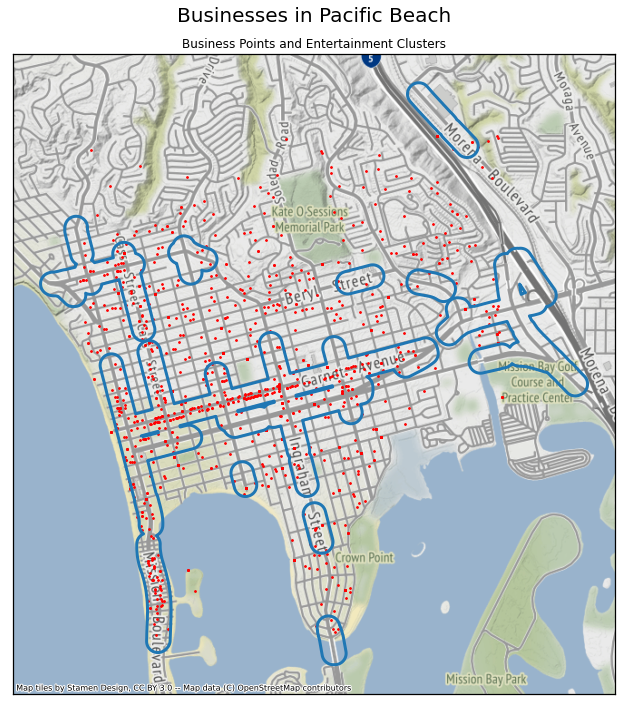

In [5]:

# PB Is also: 
#pb = cx.Place('92109', zoom=14)

pb_clusters = to_gdf(clusters.cx[-117.26:-117.22,32.78:32.82].unary_union, 4326)

fig, ax = plt.subplots(1,1, figsize = (10,10))
fig.suptitle('Businesses in Pacific Beach', fontsize=20)
ax.set_title("Business Points and Entertainment Clusters")
pb_clusters.to_crs(epsg=3857).boundary.plot(ax=ax, linewidth=3)

pb_businesses = scb.cx[-117.26:-117.22,32.78:32.82]
pb_businesses.to_crs(epsg=3857).plot(color="red", markersize=3, ax=ax)
cx.add_basemap(ax)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.tight_layout()

There are two things to notice about this map. First, there is a high density of businesses in the cluster regions (that's why they are clusters!) but second, it looks like a lot of the business ( about 25% ) are not in the clusters. Instead, those businesses are in the residential neighborhoods. Let's look at those businesses in more detail. 

We can examine the types of these businesses through their North American Industry Classification System (NAICS) code. The NAICS codes are heirarchical, so using only the leftmost digits of the code will give you higher level categories, and using more digitis will give you more details. Of the 636 businesses in this area that are not in a cluster, here are the 10 most common types of business, for three digit NAICS codes:

In [16]:
t = gpd.sjoin(pb_businesses, pb_clusters, how='left')
t = t[t.cluster_n==0]
#ax = t.to_crs(epsg=3857).plot(figsize=(9,9))
#cx.add_basemap(ax)
t = t.merge(naics)
t.naics_3_desc.value_counts().to_frame('Number of Businesses').head(11)


,Number of Businesses
"Professional, Scientific, and Technical Services",220
Personal and Laundry Services,64
Real Estate,53
Administrative and Support Services,49
Nonstore Retailers,40
Educational Services,26
Ambulatory Health Care Services,25
"Performing Arts, Spectator Sports, and Related Industries",18
Food Services and Drinking Places,15
Repair and Maintenance,14


The majority of these businesses are consulting firms, real estate agents, personal and business services, and online retailers. These types of firms form a small part of the businesses in Pacific Beach, but they are 64% of all businesses in the City of San Diego. Citywide, the 'Professional, Scientific, and Technical Services' category is 22% of all businesses, the largest category. Of the two 10 types of businesses, only a few of them are ones that would have storefronts you are likely to see driving around. 

In [21]:
t10naics = t[t.naics_3_desc!='Food Services and Drinking Places'].naics_3.value_counts().to_frame('Number of Businesses').head(10).index
#len(businesses[businesses.naics_3.isin(t10naics)])/len(businesses)
# 0.6164591727195416
#len(businesses[businesses.naics_3_desc== 'Professional, Scientific, and Technical Services'])/len(businesses)

In [8]:

t = businesses.naics_3_desc.value_counts().to_frame('Portion of Businesses (%)')
t = t.divide(len(businesses), axis=1).multiply(100).round(0)
t.head(10)

,Portion of Businesses (%)
"Professional, Scientific, and Technical Services",22.0
Personal and Laundry Services,9.0
Administrative and Support Services,7.0
Ambulatory Health Care Services,6.0
Food Services and Drinking Places,5.0
Real Estate,5.0
Nonstore Retailers,3.0
Repair and Maintenance,3.0
Educational Services,3.0
"Religious, Grantmaking, Civic, Professional, and Similar Organizations",3.0


Its very easy to think of businesses in a city as the ones you most frequently see, but most of the registered businesses — by number, not by revenue or number of employees — are very small firms that are operated from a nondescripe office building or the proprietors home. 

<AxesSubplot:>

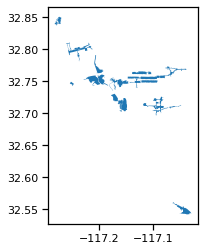

In [9]:
bid = pkg.resource('bid').geoframe()
bid.plot()

In [10]:
out_bid = businesses[businesses.bid_name.isnull()].naics_3_desc.value_counts().to_frame('out_bid')
in_bid = businesses[~businesses.bid_name.isnull()].naics_3_desc.value_counts().to_frame('in_bid')

In [22]:
t = in_bid.join(out_bid).join(businesses.naics_3_desc.value_counts().to_frame('total'))
t['in_bid_pct'] = ((t.in_bid/t.total)*100).round(0)
t['out_bid_pct'] = ((t.out_bid/t.total)*100).round(0)
t.sort_values('in_bid_pct', ascending=False).head(10)

,in_bid,out_bid,total,in_bid_pct,out_bid_pct
Accommodation and Food Services,7,10,17,41.0,59.0
Beverage and Tobacco Product Manufacturing,17,24,41,41.0,59.0
General Merchandise Stores,188,331,519,36.0,64.0
Gasoline Stations,53,111,164,32.0,68.0
Food and Beverage Stores,183,401,584,31.0,69.0
Food Services and Drinking Places,763,1862,2625,29.0,71.0
Hospitals,5,14,19,26.0,74.0
Clothing and Clothing Accessories Stores,139,413,552,25.0,75.0
Miscellaneous Store Retailers,259,793,1052,25.0,75.0
Health and Personal Care Stores,71,212,283,25.0,75.0


In [12]:
x = t.sum()
x.in_bid/x.total

0.14419207105518805

In [13]:
t[t.in_bid_pct > 14].sort_values('in_bid_pct', ascending=False)

,in_bid,out_bid,total,in_bid_pct,out_bid_pct
Accommodation and Food Services,7,10,17,41.0,59.0
Beverage and Tobacco Product Manufacturing,17,24,41,41.0,59.0
General Merchandise Stores,188,331,519,36.0,64.0
Gasoline Stations,53,111,164,32.0,68.0
Food and Beverage Stores,183,401,584,31.0,69.0
Food Services and Drinking Places,763,1862,2625,29.0,71.0
Hospitals,5,14,19,26.0,74.0
Miscellaneous Store Retailers,259,793,1052,25.0,75.0
Clothing and Clothing Accessories Stores,139,413,552,25.0,75.0
Health and Personal Care Stores,71,212,283,25.0,75.0


In [14]:
businesses[(businesses.naics_3_desc == 'Transportation Equipment Manufacturing') & (~businesses.bid_code.isnull())][['dba_name', 'gc_address']]

,dba_name,gc_address
380,SAN DIEGO AMBER WOODS HOMEOWNERS ASSOC,"3580 5TH AVE SAN DIEGO 92103-5017, CA"
7919,MOORE PERFORMANCE,"3740 GREENWOOD ST SAN DIEGO 92110, CA"
14261,SIEMENS MOBILITY INC,1255 IMPERIAL AVE SUITE 900 SAN DIEGO 92101-74...
23842,FLP GROUP INC,"3850 UNIVERSITY AVE SAN DIEGO 92105-1324, CA"
31780,BIOSPHERICAL INSTRUMENTS,"5340 RILEY ST SAN DIEGO 92110-2621, CA"
47697,KAPPA DELTA-BETA RHO CHAPTER,"5066 COLLEGE AVE SAN DIEGO 92115-2437, CA"
